Beltran_Leyva Familia 6
Beltran_Leyva Sinaloa_Family 2
Beltran_Leyva Golfo 11
Beltran_Leyva Zetas 12
Beltran_Leyva Sinaloa 11
Beltran_Leyva Juarez 8
Beltran_Leyva Tijuana 1
Familia Golfo 2
Familia Zetas 2
Familia Sinaloa 10
Familia Juarez 2
Familia Tijuana 1
Golfo Zetas 34
Golfo Sinaloa 14
Golfo Juarez 8
Golfo Tijuana 5
Juarez Zetas 4
Juarez Sinaloa 15
Juarez Tijuana 3
Sinaloa Sinaloa_Family 1
Sinaloa Otros 1
Sinaloa Zetas 7
Sinaloa Tijuana 6
Sinaloa_Family Zetas 1
Tijuana Zetas 3


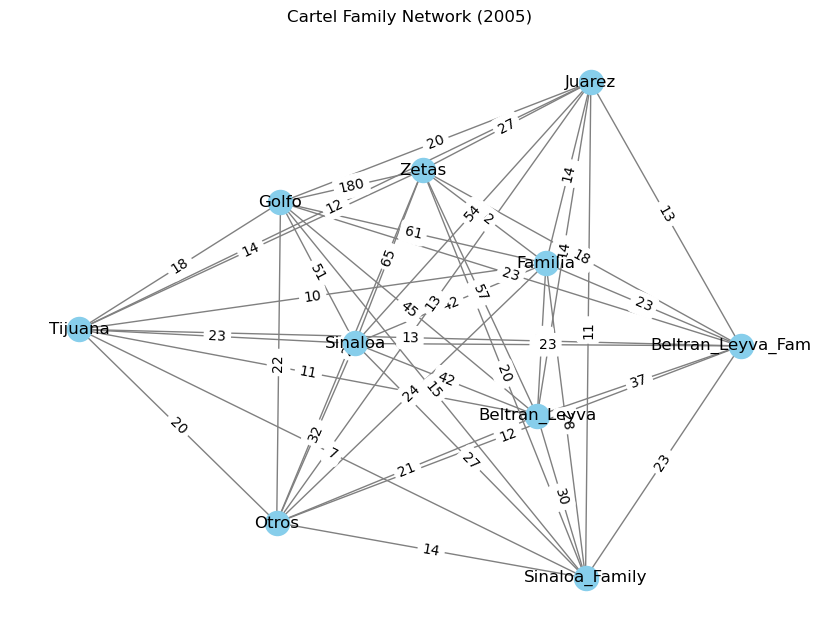

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- Load data ---
df = pd.read_csv("CosciaRios2012_DataBase.csv")

family_cols = df.columns[3:]
graphs_by_year = {}

for year in df["Year"].unique():
    B = nx.Graph()
    year_data = df[df["Year"] == year]

    # Explicitly add both node types
    B.add_nodes_from(year_data["Code"].unique(), bipartite=0)
    B.add_nodes_from(family_cols, bipartite=1)

    # Add edges (municipality-family if present)
    for _, row in year_data.iterrows():
        muni = row["Code"]
        for fam in family_cols:
            if row[fam] == 1:
                B.add_edge(muni, fam)

    # Weighted projection onto families
    G_fam = nx.bipartite.weighted_projected_graph(B, family_cols)
    graphs_by_year[year] = G_fam

# Example output
for u, v, d in graphs_by_year[2005].edges(data=True):
    print(u, v, d["weight"])

# Optional visualization
G = graphs_by_year[2010]
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Cartel Family Network (2005)")
plt.show()



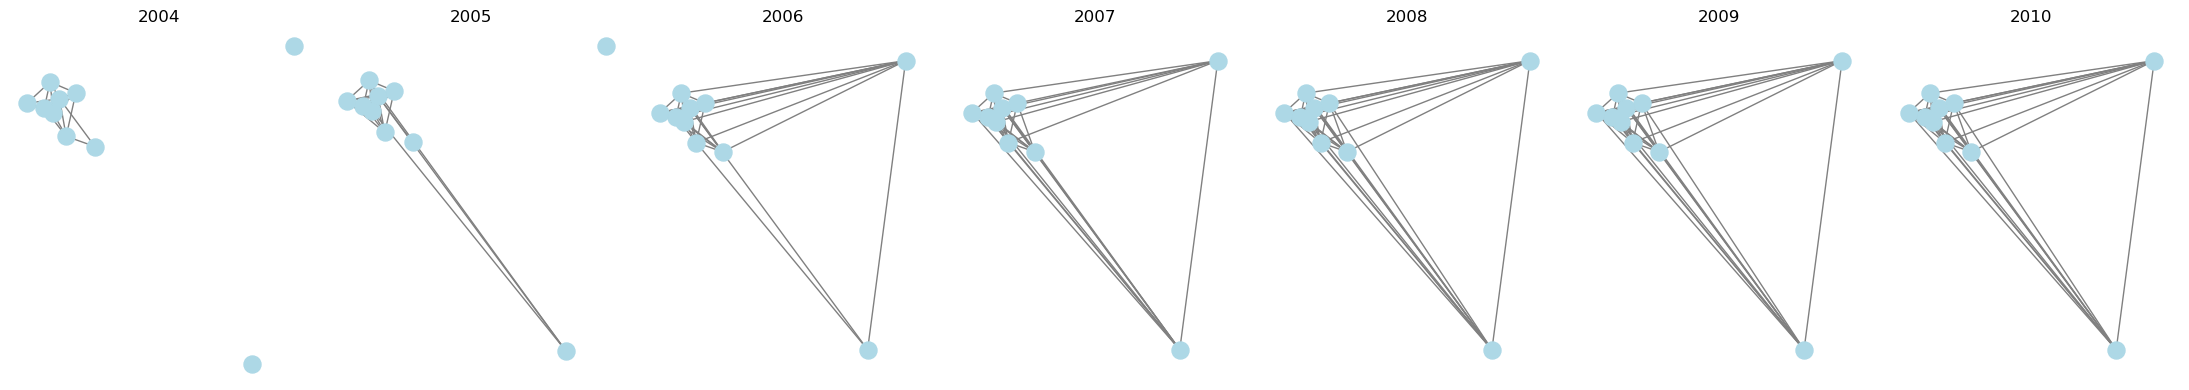

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

# Select years you want to visualize
years_to_plot = list(range(2004, 2011))  # 2004–2010 inclusive

# Define layout once (so positions are consistent across years)
# You can also recompute per graph if you prefer independent layouts
reference_year = years_to_plot[0]
pos = nx.spring_layout(graphs_by_year[reference_year], seed=42)

# Create figure with one row and N columns
fig, axes = plt.subplots(1, len(years_to_plot), figsize=(22, 4))

for i, year in enumerate(years_to_plot):
    ax = axes[i]
    G = graphs_by_year[year]
    
    # Reuse same node positions but adjust for missing nodes
    nx.draw(
        G, pos=pos, ax=ax,
        node_size=150,
        node_color="lightblue",
        edge_color="gray",
        with_labels=False
    )
    ax.set_title(str(year))
    ax.axis("off")

plt.tight_layout()
plt.show()



## Number of nodes

In [17]:
import pandas as pd

# Check number of nodes for each year
nodes_by_year = []
for year in sorted(graphs_by_year.keys()):
    G = graphs_by_year[year]
    n_nodes = G.number_of_nodes()
    nodes_by_year.append({'Year': year, 'Nodes': n_nodes})

nodes_df = pd.DataFrame(nodes_by_year)

print("NUMBER OF NODES (FAMILIES) PER YEAR")
print(nodes_df.to_string(index=False))
print(f"All years have {nodes_df['Nodes'].unique()[0]} nodes: {nodes_df['Nodes'].nunique() == 1}")


NUMBER OF NODES (FAMILIES) PER YEAR
 Year  Nodes
 1990     10
 1991     10
 1992     10
 1993     10
 1994     10
 1995     10
 1996     10
 1997     10
 1998     10
 1999     10
 2000     10
 2001     10
 2002     10
 2003     10
 2004     10
 2005     10
 2006     10
 2007     10
 2008     10
 2009     10
 2010     10
All years have 10 nodes: True


## Number of edges per year 

REPORTED CASES BY YEAR
 Year  Edges
 1990      0
 1991      0
 1992      1
 1993      2
 1994      2
 1995      2
 1996      5
 1997      2
 1998      4
 1999      2
 2000      4
 2001     13
 2002      5
 2003     13
 2004     19
 2005     25
 2006     37
 2007     41
 2008     45
 2009     45
 2010     45


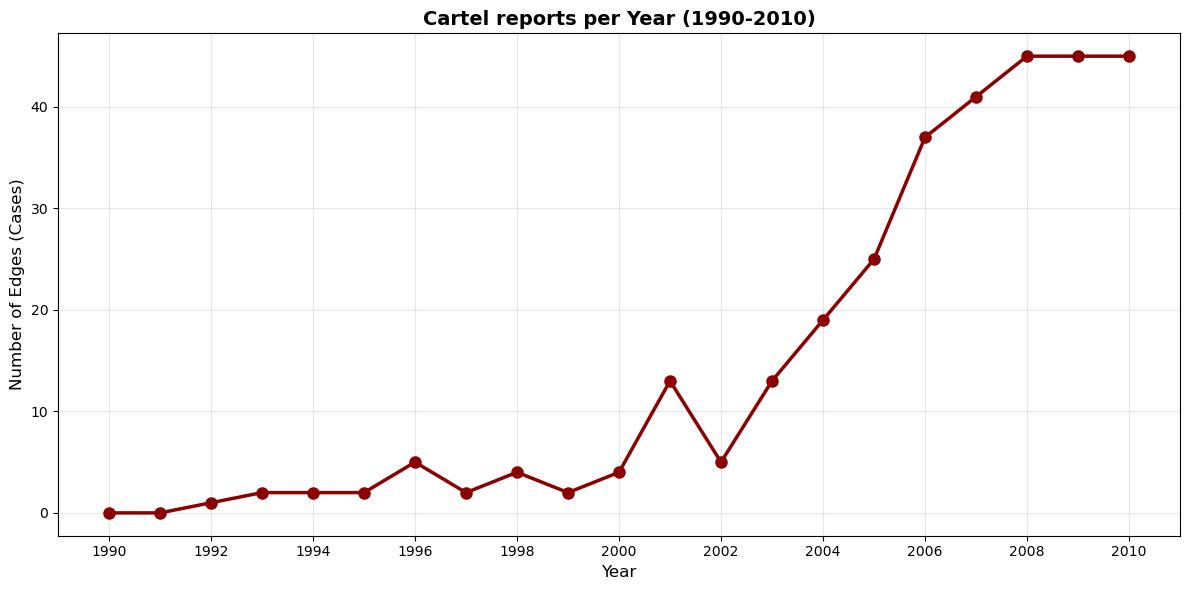

In [13]:
metrics_data = []
for year in sorted(graphs_by_year.keys()):
    G = graphs_by_year[year]
    n_edges = G.number_of_edges()
    
    metrics_data.append({
        'Year': year,
        'Edges': n_edges
    })

metrics_df = pd.DataFrame(metrics_data)

# Print the number of edges per year
print("REPORTED CASES BY YEAR")
print(metrics_df.to_string(index=False))

# Plot: Number of Edges over time
plt.figure(figsize=(12, 6))
plt.plot(metrics_df['Year'], metrics_df['Edges'], marker='o', linewidth=2.5, markersize=8, color='darkred')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Edges (Cases)', fontsize=12)
plt.title('Cartel reports per Year (1990-2010)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(1990, 2011, 2))
plt.tight_layout()
plt.show()

## Average degree

In [ ]:
# Simple: compute and plot average (unweighted) degree per year
import pandas as pd
import matplotlib.pyplot as plt

avg_rows = []
for year in sorted(graphs_by_year.keys()):
    G = graphs_by_year[year]
    n = G.number_of_nodes()
    if n > 0:
        avg_deg = sum(dict(G.degree()).values()) / n
    else:
        avg_deg = 0
    avg_rows.append({'Year': year, 'AverageDegree': round(avg_deg, 2)})

avg_df = pd.DataFrame(avg_rows)
print('Average degree by year:')
print(avg_df.to_string(index=False))

plt.figure(figsize=(10,4))
plt.plot(avg_df['Year'], avg_df['AverageDegree'], marker='o', color='tab:blue')
plt.xlabel('Year')
plt.ylabel('Average degree')
plt.title('Average degree per year (simple)')
plt.grid(alpha=0.3)
plt.xticks(range(min(avg_df['Year']), max(avg_df['Year'])+1, 2))
plt.tight_layout()
plt.show()

## Degree per family through the years

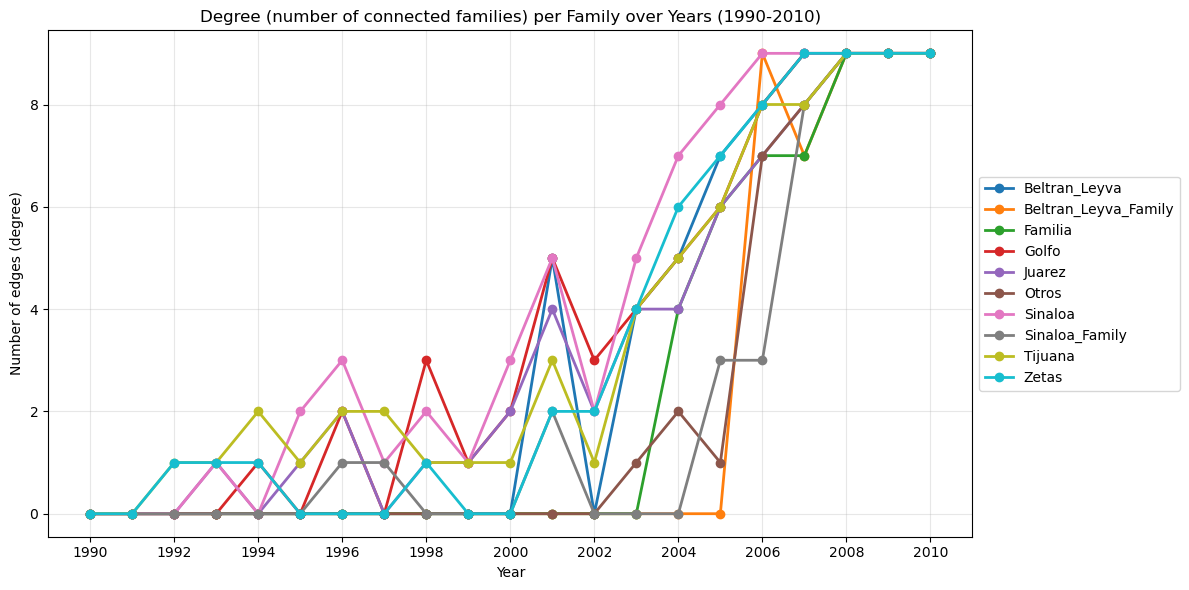

In [28]:
# Compute and plot degree per family through time
import pandas as pd
import matplotlib.pyplot as plt

rows = []
for year in sorted(graphs_by_year.keys()):
    G = graphs_by_year[year]
    deg = dict(G.degree())
    # family nodes are strings; municipality nodes are numeric codes
    fam_nodes = sorted([n for n in G.nodes() if isinstance(n, str)])
    for fam in fam_nodes:
        rows.append({'Year': year, 'Family': fam, 'Degree': deg.get(fam, 0)})
df_deg = pd.DataFrame(rows)

pivot_deg = df_deg.pivot(index='Year', columns='Family', values='Degree').fillna(0)

# Plot: one line per family
plt.figure(figsize=(12, 6))
for fam in pivot_deg.columns:
    plt.plot(pivot_deg.index, pivot_deg[fam], marker='o', label=fam, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Number of edges (degree)')
plt.title('Degree (number of connected families) per Family over Years (1990-2010)')
plt.grid(alpha=0.3)
plt.xticks(range(1990, 2011, 2))

# Place legend outside to avoid overlapping the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

## Average shortest path    